# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
MouseCount=len(combined_data["Mouse ID"].unique())
print(MouseCount)



249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates=combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mouse_ids = duplicates['Mouse ID'].unique()
print(duplicate_mouse_ids)


['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids

array(['g989'], dtype=object)

In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[~combined_data['Mouse ID'].isin(duplicates['Mouse ID'].unique())]

clean_df.head(125)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2


In [7]:
# Checking the number of mice in the clean DataFrame.
NewMouseCount=len(clean_df["Mouse ID"].unique())
print(NewMouseCount)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'  # Standard Error of the Mean
).reset_index()

summary_stats


,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).reset_index()

summary_stats



,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

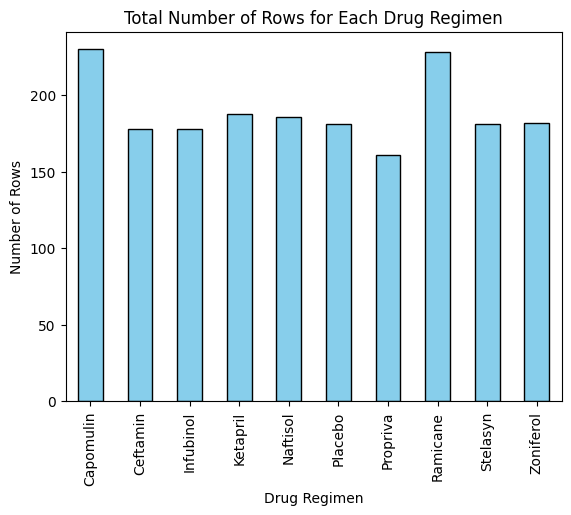

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

row_count = combined_data.groupby('Drug Regimen').size()

# Plot the bar chart
row_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

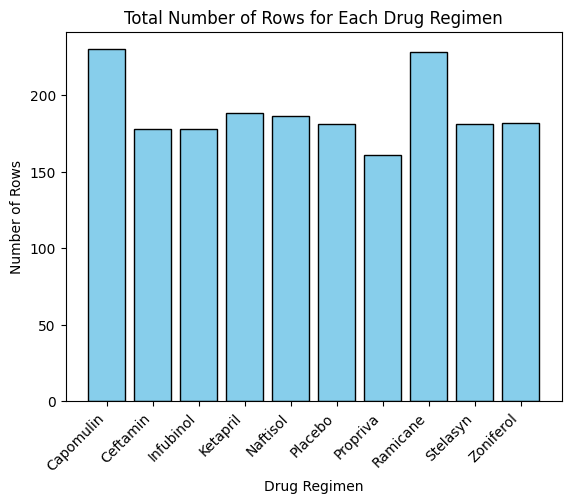

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_count = combined_data.groupby('Drug Regimen').size()

# Plot the bar chart using pyplot
plt.bar(row_count.index, row_count, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

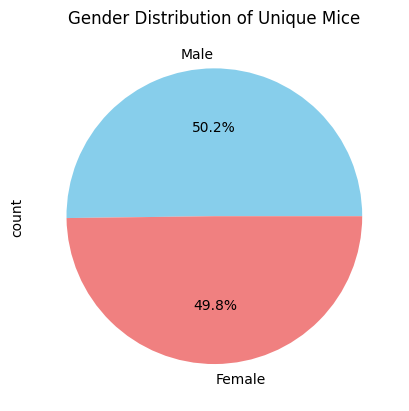

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Unique Mice')
plt.show()

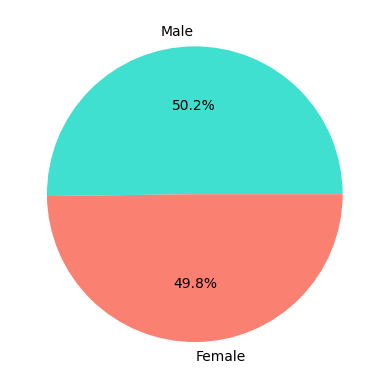

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset=['Mouse ID'])

gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['turquoise', 'salmon'])
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Step 1: Get the last(greatest) timepoint for each mouse
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = combined_data.merge(last_timepoint, on=['Mouse ID', 'Timepoint'])
# Step 3: Filter for the specified drug regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(regimens)]

final_tumor_volume_filtered.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:

    tumor_volumes = combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

print(f"Outliers for {treatment}: {outliers}") 

Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


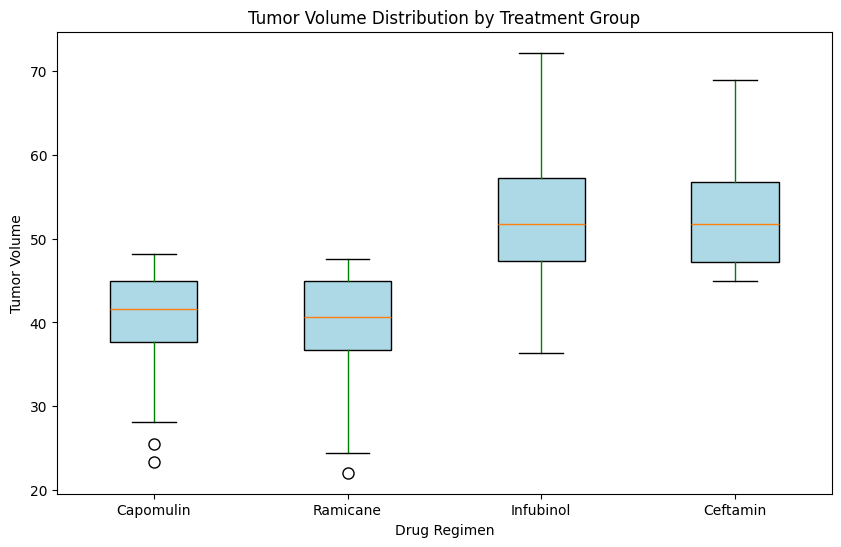

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, 
            patch_artist=True, # Color the boxes
            boxprops=dict(facecolor='lightblue', color='black'), 
            whiskerprops=dict(color='green'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.xticks([1, 2, 3, 4], treatments)  # Set x-axis labels for each treatment group

# Show the plot
plt.show()

## Line and Scatter Plots

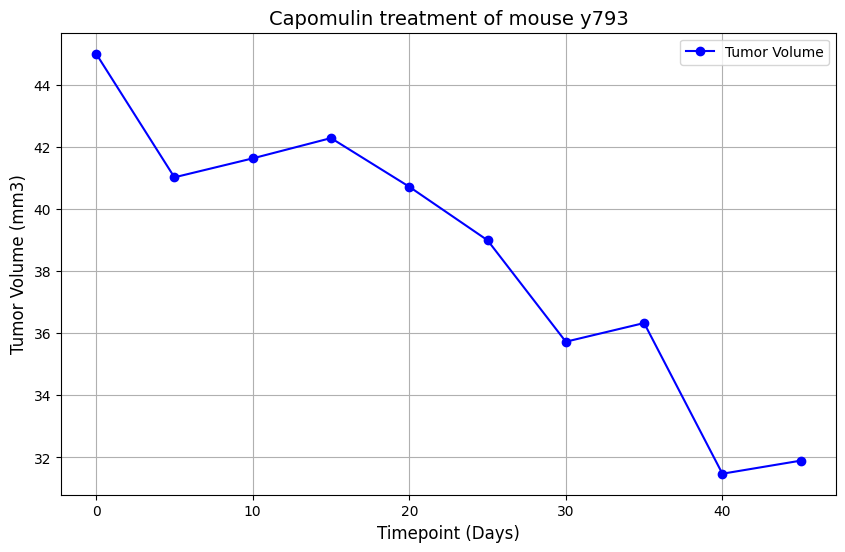

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = combined_data[(combined_data['Mouse ID'] == 'y793') & (combined_data['Drug Regimen'] == 'Capomulin')]

#  Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume')

# Customize the plot with titles and labels
plt.title('Capomulin treatment of mouse y793', fontsize=14)
plt.xlabel('Timepoint (Days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



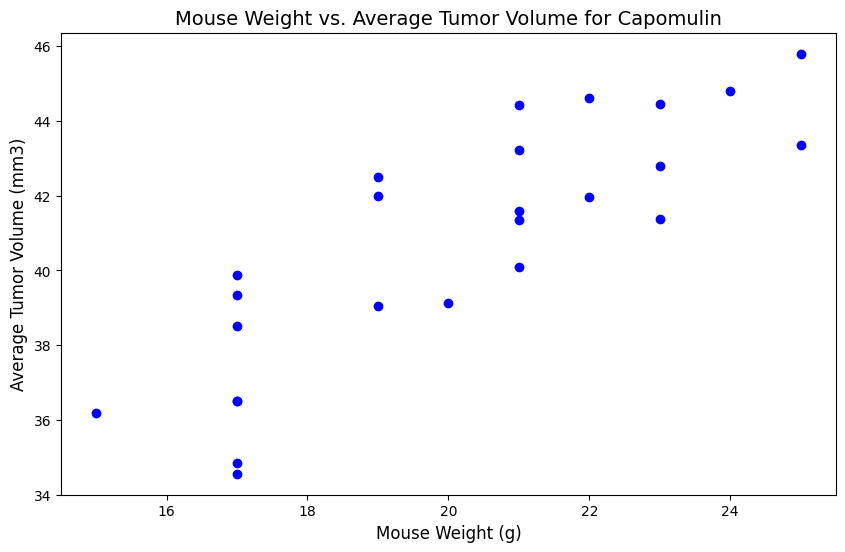

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group by Mouse ID and calculate the average tumor volume
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Merge the average tumor volume data with the weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = avg_tumor_vol.to_frame().merge(mouse_weight_data, on='Mouse ID')

# Step 4: Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')

# Step 5: Customize the plot with titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722
Linear Regression Results:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


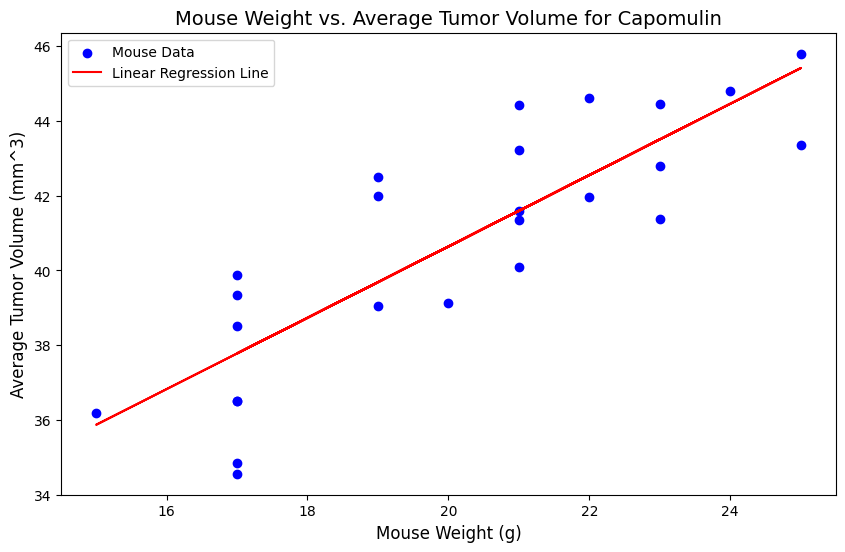

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#  Filter the data for Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#  Merge the average tumor volume data with the weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = avg_tumor_vol.to_frame().merge(mouse_weight_data, on='Mouse ID')

#  Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Perform linear regression to get the slope, intercept, and other statistics
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Print the linear regression results
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Plot the data and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o', label='Mouse Data')

# Add the linear regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r', label='Linear Regression Line')

#  Customize the plot with titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm^3)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

